<a href="https://colab.research.google.com/github/Derryllll/Analisis-sentimen-tokopedia-menggunakan-algoritma-naive-bayes-dan-support-vector-machine/blob/main/preprocessing_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INSTALL 

In [ ]:
!pip install Sastrawi
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#LIBRARY

In [ ]:
import pandas as pd
import numpy as np #vektor matriks mengelola array / array multidimensi
import nltk #bekerja dg teks
import re, string #regular express / variabel
import sys #system spesific parameters
import seaborn as sns
import collections
import matplotlib.pyplot as plt
nltk.download('stopwords')
from time import time
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #analisis dokumen
from sklearn.feature_extraction.text import CountVectorizer
#from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Load data

In [ ]:
def load_data():
  data = pd.read_excel('datamentah1K.xlsx')
  return data

df = load_data()
df.head()

,pada,skor,isi
0,2022-05-13 09:19:00,1,Bonus pengguna baru diberikan dengan beberapa ...
1,2022-04-25 18:01:00,2,"Saya sangat suka berbelanja di Tokopedia, apal..."
2,2022-05-14 13:00:00,5,"Tokopedia paling keren. Gratis ongkos kirim, t..."
3,2022-05-14 04:12:00,2,"Setelah diperbarui, mengapa lebih buruk? Setia..."
4,2022-04-25 13:09:00,1,Mohon sembunyikan toko yang sudah lama tidak a...


In [ ]:
NaN = pd.Series(df['isi'])
NaN.isnull().values.any()

False

In [ ]:
#mengecek apakah ada duplikat data?
print(df.shape)
df.duplicated().sum()

(1000, 3)


0

In [ ]:
df_skor = df["skor"].value_counts()
df_skor

5    365
1    317
4    157
3     91
2     70
Name: skor, dtype: int64

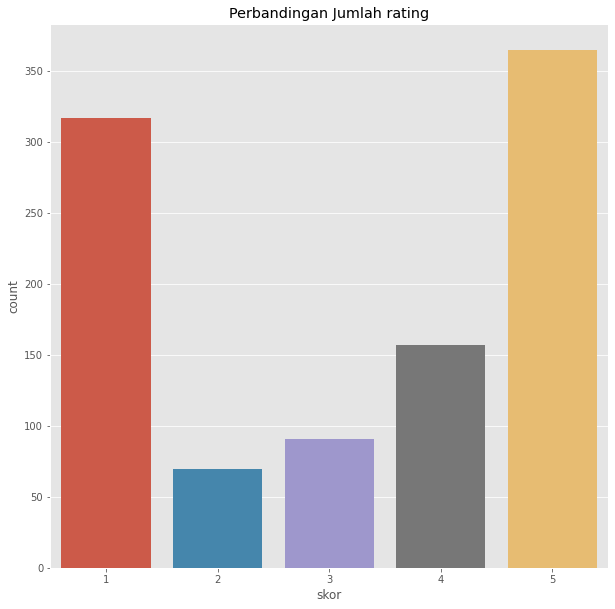

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x='skor', data=df)
ax.set_title('Perbandingan Jumlah rating')  # 0 = negatif | 1 = positive
plt.savefig("Perbandingan Jumlah rating - Bar Chart.png", bbox_inches="tight", dpi=480)
plt.show()

In [ ]:
df = df.drop(['pada', 'skor'], axis=1)
df.head()

,isi
0,Bonus pengguna baru diberikan dengan beberapa ...
1,"Saya sangat suka berbelanja di Tokopedia, apal..."
2,"Tokopedia paling keren. Gratis ongkos kirim, t..."
3,"Setelah diperbarui, mengapa lebih buruk? Setia..."
4,Mohon sembunyikan toko yang sudah lama tidak a...


#Casefolding

In [ ]:
#casefolding
def preprocess(text):
  #Remove punctuation
  text = re.compile('[%s²]' % re.escape(string.punctuation)).sub(' ', text)

  #Remove emot m lower case
  text = re.sub(r'[^\w\s]', '', str(text).lower().strip())

  #Remove angka
  text = re.sub(r"[0-9]", "",text)

  #Remove white space
  text = re.sub(r'\s+', ' ', text) 
  return text
df['isi'] = df['isi'].apply(preprocess)
df.head()

,isi
0,bonus pengguna baru diberikan dengan beberapa ...
1,saya sangat suka berbelanja di tokopedia apala...
2,tokopedia paling keren gratis ongkos kirim tid...
3,setelah diperbarui mengapa lebih buruk setiap ...
4,mohon sembunyikan toko yang sudah lama tidak a...


In [ ]:
df.to_excel("casefolding.xlsx", index = False) #save data

#Tokenizing

In [ ]:
def token(content):
  nstr = content.split(' ')
  dat = []
  a = -1
  for hu in nstr:
    a = a + 1
  if hu == '':
    dat.append(a)
  p = 0
  b = 0
  for q in dat:
    b = q -p
    del nstr[b]
    p = p + 1
  return nstr
df['isi'] = df['isi'].apply(token)
df.head()

,isi
0,"[bonus, pengguna, baru, diberikan, dengan, beb..."
1,"[saya, sangat, suka, berbelanja, di, tokopedia..."
2,"[tokopedia, paling, keren, gratis, ongkos, kir..."
3,"[setelah, diperbarui, mengapa, lebih, buruk, s..."
4,"[mohon, sembunyikan, toko, yang, sudah, lama, ..."


In [ ]:
df.to_excel("token.xlsx", index = False) #save data

#Filtering

In [ ]:
def stopword_removal(content):
  filtering = stopwords.words('indonesian', 'english')
  x = []
  data = []
  def myFunc(x):
    if x in filtering:
      return False
    else:
      return True
  fit = filter(myFunc, content)
  for x in fit:
    data.append(x)
  return data
df['isi'] = df['isi'].apply(stopword_removal)
df.head()

,isi
0,"[bonus, pengguna, metode, pembayaran, transaks..."
1,"[suka, berbelanja, tokopedia, diskon, pengemba..."
2,"[tokopedia, keren, gratis, ongkos, kirim, peli..."
3,"[diperbarui, buruk, kali, membuka, produk, seb..."
4,"[mohon, sembunyikan, toko, aktif, produk, habi..."


In [ ]:
stop_removal = df[['isi']]

def fit_stopwords(text):
    text = np.array(text)
    text = ' '.join(text)
    return text

df['isi'] = df['isi'].apply(lambda x: fit_stopwords(x))
df.head()

,isi
0,bonus pengguna metode pembayaran transaksi ses...
1,suka berbelanja tokopedia diskon pengembalian ...
2,tokopedia keren gratis ongkos kirim pelit prom...
3,diperbarui buruk kali membuka produk sebentar ...
4,mohon sembunyikan toko aktif produk habis terj...


In [ ]:
df.to_excel("filter.xlsx", index = False) #save data

#Stemming

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return stemmer.stem(text)

df['isi'] = df['isi'].apply(lambda x: stemming(x))
df.head()

test time:  0.000s


,isi
0,bonus guna metode bayar transaksi sesuai prose...
1,suka belanja tokopedia diskon kembali dana bar...
2,tokopedia keren gratis ongkos kirim pelit prom...
3,baru buruk kali buka produk sebentar beranda u...
4,mohon sembunyi toko aktif produk habis jual ak...


In [ ]:
df.to_excel("stemming_2.xlsx", index = False) #save data

#LABELING - VISUALISASI

In [ ]:
def load_data():
  data = pd.read_excel('stemming_label_2.xlsx')
  return data

df = load_data()
df.head()

,isi,label
0,bonus guna metode bayar transaksi sesuai prose...,NEGATIVE
1,suka belanja tokopedia diskon kembali dana bar...,NEGATIVE
2,tokopedia keren gratis ongkos kirim pelit prom...,POSITIVE
3,baru buruk kali buka produk sebentar beranda u...,NEGATIVE
4,mohon sembunyi toko aktif produk habis jual ak...,NEGATIVE


In [ ]:
#menghitung banyaknya label sentimen positive dan negative
df['label'].value_counts()

NEGATIVE    527
POSITIVE    473
Name: label, dtype: int64

<Figure size 3600x2400 with 0 Axes>

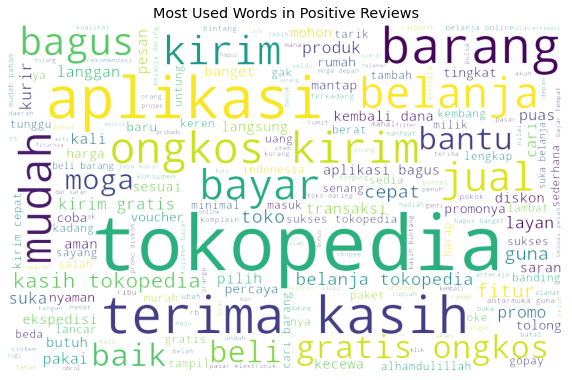

In [ ]:
positive_words =' '.join([text for text in df['isi'][df['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(positive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Words in Positive Reviews")
plt.savefig("Most Used Words in Positive Reviews.png", bbox_inches="tight", dpi=480)
plt.show()

<Figure size 3600x2400 with 0 Axes>

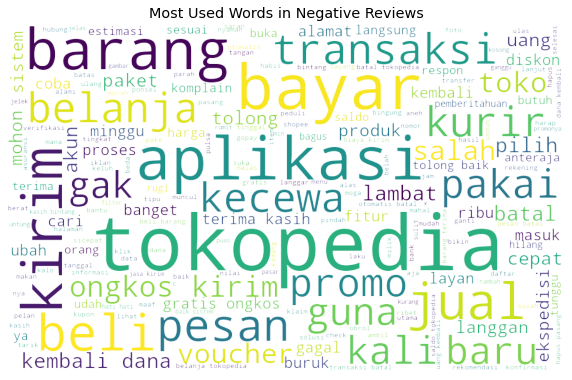

In [ ]:
negative_words =' '.join([text for text in df['isi'][df['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, 
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(negative_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Words in Negative Reviews")
plt.savefig("Most Used Words in Negative Reviews.png", bbox_inches="tight", dpi=480)
plt.show()

In [ ]:
nilai_negatif = df['label'].value_counts()[0]
nilai_positif = df['label'].value_counts()[1]
persen_negatif = round((nilai_negatif/df['label'].count()), 2) * 100
persen_positif = round((nilai_positif/df['label'].count()), 2) * 100
hasil = [persen_negatif, persen_positif]

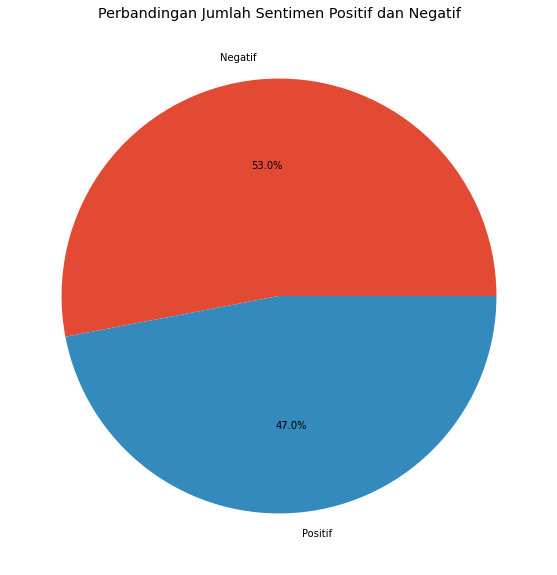

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(hasil, labels=['Negatif', 'Positif'], shadow=False, autopct='%1.1f%%')
ax.set_title('Perbandingan Jumlah Sentimen Positif dan Negatif')
plt.savefig("Perbandingan Jumlah Sentimen Positif dan Negatif - Pie Chart.png", bbox_inches="tight", dpi=480)
plt.show()

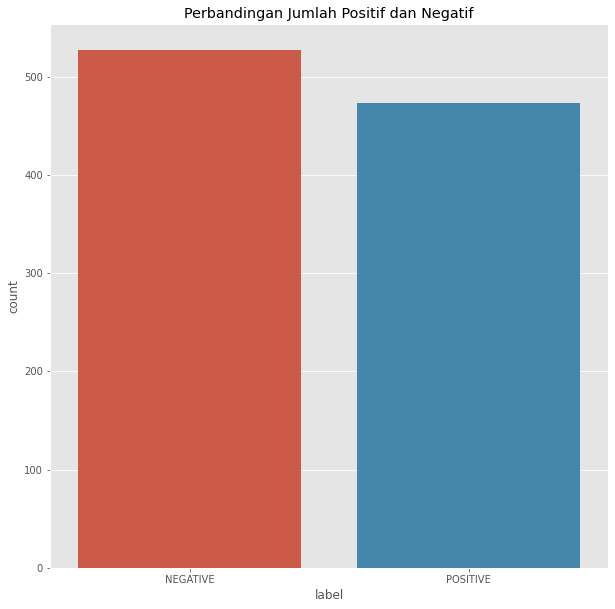

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x='label', data=df)
ax.set_title('Perbandingan Jumlah Positif dan Negatif')  # 0 = negatif | 1 = positive
plt.savefig("Perbandingan Jumlah Sentimen Positif dan Negatif - Bar Chart.png", bbox_inches="tight", dpi=480)
plt.show()

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key= lambda x: x[1], reverse=True)
    return words_freq[:n]

tokopedia 959
kirim 561
aplikasi 460
barang 423
bayar 382
belanja 330
beli 280
jual 256
terima 243
kasih 232


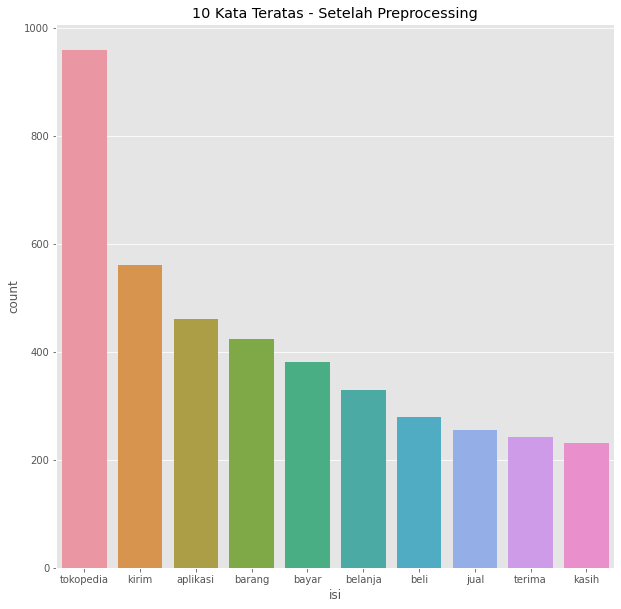

In [ ]:
common_words = get_top_n_bigram(df['isi'], 10)
for word, freq in common_words:
  print(word, freq)
df_after_stopwords = pd.DataFrame(common_words, columns = ['isi', 'count'])

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='isi', y='count', data=df_after_stopwords)
ax.set_title('10 Kata Teratas - Setelah Preprocessing')
plt.savefig("10 kata teratas setelah preprocessing - Bar Chart.png", bbox_inches="tight", dpi=480)
plt.show()

In [ ]:
df_data = pd.read_excel("datamentah1K.xlsx")

In [ ]:
from sklearn import preprocessing

def label_encoder(data):
    le = preprocessing.LabelEncoder()
    data = le.fit_transform(data)
    return data
  
#negative = 0 // positive = 1
df['label'] = label_encoder(df['label'])
df.head()

,isi,label
0,bonus guna metode bayar transaksi sesuai prose...,0
1,suka belanja tokopedia diskon kembali dana bar...,0
2,tokopedia keren gratis ongkos kirim pelit prom...,1
3,baru buruk kali buka produk sebentar beranda u...,0
4,mohon sembunyi toko aktif produk habis jual ak...,0


In [ ]:
common_words_good = get_top_n_bigram(df[df['label']==1]['isi'], 20)
common_words_bad= get_top_n_bigram(df[df['label']==0]['isi'], 20)

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


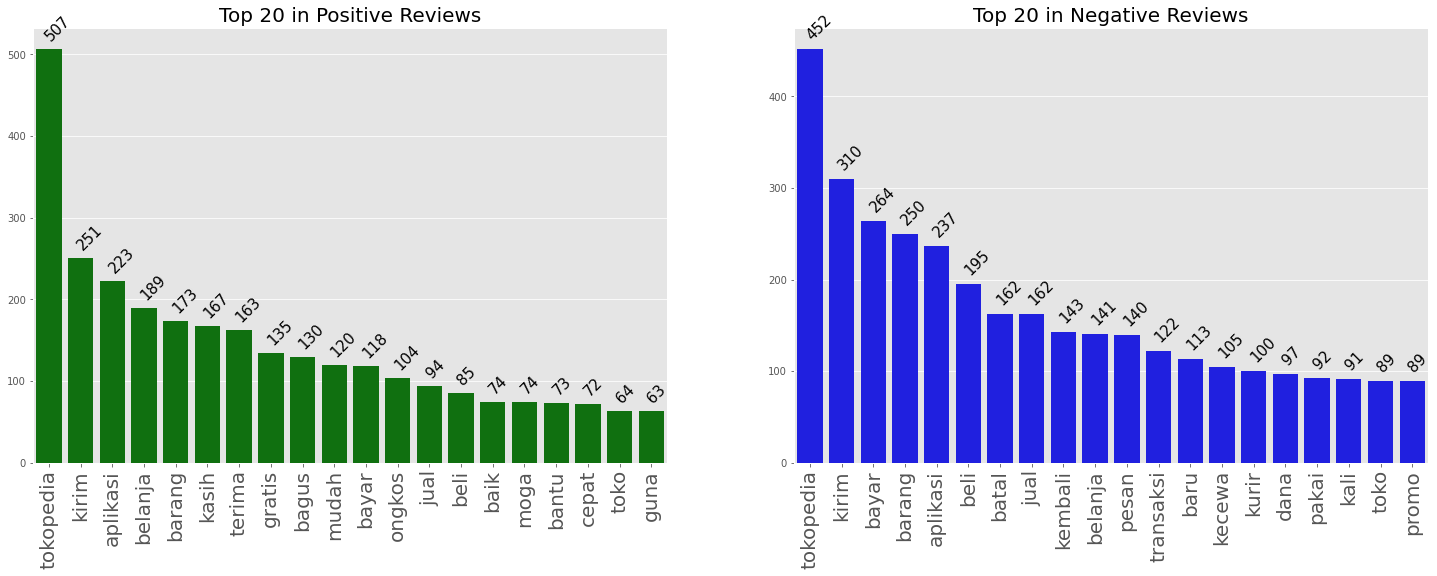

In [ ]:
plt.figure(figsize=(25,8))
# good reviews bigrams
plt.subplot(1,2,1)
x_good=[x[0] for x in common_words_good]
y_good=[x[1] for x in common_words_good]
sns.barplot(x_good,y_good,color='g')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 in Positive Reviews",fontsize=20)
for i in range(len(x_good)):
    plt.text(i-0.2,y_good[i]+10,'{}'.format(y_good[i]),size=15,rotation=45)
    
plt.subplot(1,2,2)
x_bad=[x[0] for x in common_words_bad]
y_bad=[x[1] for x in common_words_bad]
sns.barplot(x_bad,y_bad,color='b')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 in Negative Reviews",fontsize=20)
for i in range(len(x_bad)):
    plt.text(i-0.2,y_bad[i]+10,'{}'.format(y_bad[i]),size=15,rotation=45)
plt.savefig("top wordn in positive n negative - Bar Chart.png", bbox_inches="tight", dpi=480)

saya 1244
tidak 1021
tokopedia 959
dan 866
yang 854
di 730
ada 449
bisa 447
untuk 439
aplikasi 386


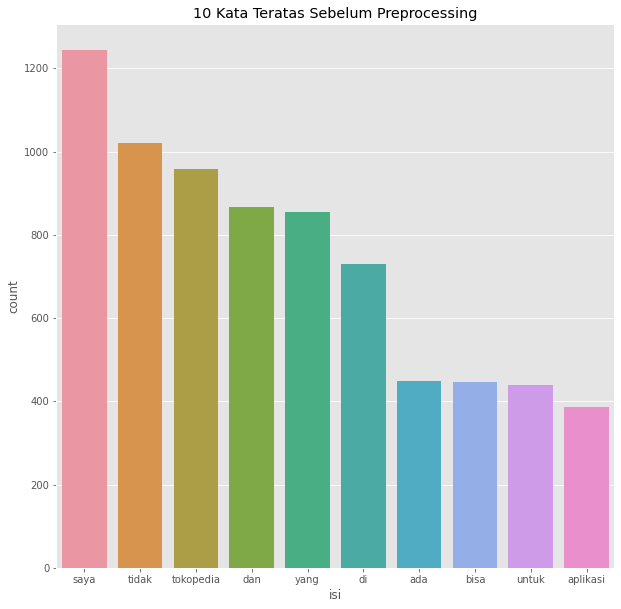

In [ ]:
before_stopwords = get_top_n_bigram(df_data['isi'], 10)
for word, freq in before_stopwords:
    print(word, freq)
df_before_stopwords = pd.DataFrame(before_stopwords, columns=['isi', 'count'])

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x='isi', y='count', data=df_before_stopwords)
ax.set_title('10 Kata Teratas Sebelum Preprocessing')
plt.savefig("10 kata teratas sebelum preprocessing - Bar Chart.png", bbox_inches="tight", dpi=480)
plt.show()